<a href="https://colab.research.google.com/github/LezendarySandwich/CSL7550-Stock-Price-Prediction/blob/master/LSTM_RELIANCE_RESULT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt 

if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')

In [ ]:
from datetime import date

STORAGE = '/content/drive/MyDrive' #@param {type : "string"}
KAGGLE_DIR = 'Kaggle' #@param {type : "string"}
KAGGLE_JSON_PATH = os.path.join(STORAGE, KAGGLE_DIR)
QUANDL_PATH = os.path.join(KAGGLE_JSON_PATH, '.quandl')
__PROJECT = os.path.join(STORAGE, 'Neo')
ML_DATASET = os.path.join(__PROJECT, 'dataset')
START_DATE = date(2014, 1, 1)
END_DATE = date(2019,1,1)
STOCK = 'RELIANCE'#@param {type : "string"}
SAVE_DIR = os.path.join(ML_DATASET, f'{STOCK}_{START_DATE}_{END_DATE}')
TEST_DS = os.path.join(SAVE_DIR,'dataset_test.csv')
TRAIN_DS = os.path.join(SAVE_DIR,'dataset_train.csv')

In [ ]:
train_df= pd.read_csv(TRAIN_DS)
test_df= pd.read_csv(TEST_DS)
train_df

,Date,Open,High,Low,Close,Volume
0,2014-01-01,897.45,898.25,887.60,888.80,1337074.0
1,2014-01-02,887.70,896.00,870.10,875.00,1376901.0
2,2014-01-03,871.60,873.35,855.00,864.25,2933613.0
3,2014-01-06,862.10,863.25,850.00,854.95,3043781.0
4,2014-01-07,854.60,859.95,840.05,842.10,3957111.0
...,...,...,...,...,...,...
982,2017-12-22,914.65,922.40,909.30,920.40,4872675.0
983,2017-12-26,924.85,938.90,918.15,929.80,5301456.0
984,2017-12-27,933.00,937.50,919.00,923.75,4352384.0
985,2017-12-28,925.25,934.40,919.10,924.20,7091515.0


In [ ]:
train_dates_df= train_df['Date']
train_df= train_df.drop(columns=["Date"])
test_dates_df= test_df['Date']
test_df= test_df.drop(columns=['Date']) 

In [ ]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
import numpy as np

sc = MinMaxScaler(feature_range=(0,1), copy = True)
training_set_scaled = sc.fit_transform(train_df)
x_train = []
y_train = []

for i in range(60,len(train_df)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.12131994, 0.11012912, 0.09164993, ..., 0.11420373, 0.10014347,
        0.10272597],
       [0.11012912, 0.09164993, 0.08074605, ..., 0.10014347, 0.10272597,
        0.11833572],
       [0.09164993, 0.08074605, 0.07213773, ..., 0.10272597, 0.11833572,
        0.12424677],
       ...,
       [0.        , 0.00373027, 0.00855093, ..., 0.14542324, 0.14106169,
        0.15276901],
       [0.00373027, 0.00855093, 0.03816356, ..., 0.14106169, 0.15276901,
        0.16212339],
       [0.00855093, 0.03816356, 0.03701578, ..., 0.15276901, 0.16212339,
        0.15322812]])

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
#Adding the first LSTM layer and some dropout regularization to avoid overfitting
regressor = Sequential()
#Add first LSTM layer
regressor.add(LSTM(units= 50, return_sequences=True, input_shape = (x_train.shape[1],1) )) #No of LSTM cells = units, return_sequences = True because we are building a stacked LSTM which will have several LSTM layers, when you are done adding LSTM layers set it to False whch is the default, input_shape (timesteps,predictors)
#Add dropout regularization
regressor.add(Dropout(rate = 0.2)) #rate of neurons you want to drop during regularization (during each iteration of the forward and back propagation)

#Add Second LSTM Layer and dropout regularization 
regressor.add(LSTM(units= 50, return_sequences=True )) #No of LSTM cells = units, return_sequences = True because we are building a stacked LSTM which will have several LSTM layers, when you are done adding LSTM layers set it to False whch is the default 
#Add dropout regularization
regressor.add(Dropout(rate = 0.2)) #rate of neurons you want to drop during regularization (during each iteration of the forward and back propagation)

#Add Third LSTM Layer and dropout regularization 
regressor.add(LSTM(units= 50, return_sequences=True )) #No of LSTM cells = units, return_sequences = True because we are building a stacked LSTM which will have several LSTM layers, when you are done adding LSTM layers set it to False whch is the default 
#Add dropout regularization
regressor.add(Dropout(rate = 0.2)) #rate of neurons you want to drop during regularization (during each iteration of the forward and back propagation)

#Add Fourth LSTM Layer and dropout regularization 
#return_sequences=False because this is our last LSTM layer
regressor.add(LSTM(units= 50, return_sequences=False )) #No of LSTM cells = units, return_sequences = True because we are done adding LSTM layers 
#Add dropout regularization
regressor.add(Dropout(rate = 0.2)) #rate of neurons you want to drop during regularization (during each iteration of the forward and back propagation)

#Add the output layer for full connection

regressor.add(Dense(units=1 ))

#Compiling the RNN

regressor.compile(optimizer="adam", loss = "mean_squared_error") #optimizer="rmsprop" recommended for RNN but adam is always a safe and good choice
#loss = "mean_squared_error" for regression 



In [ ]:
regressor.fit(x_train,y_train, epochs= 100, batch_size=32)

Epoch 1/100
29/29 [==============================] - 10s 128ms/step - loss: 0.0326
Epoch 2/100
29/29 [==============================] - 4s 130ms/step - loss: 0.0157
Epoch 3/100
29/29 [==============================] - 4s 124ms/step - loss: 0.0118
Epoch 4/100
29/29 [==============================] - 4s 126ms/step - loss: 0.0134
Epoch 5/100
29/29 [==============================] - 4s 128ms/step - loss: 0.0094
Epoch 6/100
29/29 [==============================] - 4s 124ms/step - loss: 0.0078
Epoch 7/100
29/29 [==============================] - 4s 126ms/step - loss: 0.0086
Epoch 8/100
29/29 [==============================] - 4s 128ms/step - loss: 0.0082
Epoch 9/100
29/29 [==============================] - 4s 124ms/step - loss: 0.0071
Epoch 10/100
29/29 [==============================] - 4s 129ms/step - loss: 0.0068
Epoch 11/100
29/29 [==============================] - 4s 129ms/step - loss: 0.0061
Epoch 12/100
29/29 [==============================] - 4s 130ms/step - loss: 0.0070
Epoch 13/100

In [ ]:
FUTURE_PREDICTION_RANGE = 60 #@param {type : "number"}
WINDOW = 60 #@param {type : "number"}

#Concatenating the training dataset and test dataset by row to form a total dataset
dataset_total = pd.concat((train_df["Open"], test_df["Open"]), axis = 0)

#Extract last 60 data from the training dataset + all the data from the test dataset (60 because we trained the model with 60 timesteps)
inputs = dataset_total[len(dataset_total) - len(test_df) - WINDOW:].values
inputs = inputs.reshape(-1,1)
#print(inputs)
#Feature Scaling
tmp=train_df["Open"].values
tmp=tmp.reshape(-1,1)
sc.fit(tmp)
inputs = sc.transform(inputs)
inputs

array([[0.03816356],
       [0.03701578],
       [0.05423242],
       [0.04505022],
       [0.06146341],
       [0.05779053],
       [0.1004878 ],
       [0.10014347],
       [0.0989957 ],
       [0.09830703],
       [0.14238164],
       [0.13905308],
       [0.1789957 ],
       [0.1702726 ],
       [0.17015782],
       [0.18163558],
       [0.16327116],
       [0.17583931],
       [0.17905308],
       [0.18484935],
       [0.18846485],
       [0.17302726],
       [0.16252511],
       [0.12711621],
       [0.11822095],
       [0.12533716],
       [0.10703013],
       [0.09555237],
       [0.10645624],
       [0.10760402],
       [0.14599713],
       [0.13136298],
       [0.15500717],
       [0.16723099],
       [0.15982783],
       [0.18163558],
       [0.1784792 ],
       [0.18146341],
       [0.17228121],
       [0.17182209],
       [0.1523099 ],
       [0.13974175],
       [0.12545194],
       [0.13572453],
       [0.15873745],
       [0.163099  ],
       [0.15001435],
       [0.142

In [ ]:
x_test = []
for i in range(WINDOW,WINDOW+FUTURE_PREDICTION_RANGE): #test data contains 80 rows of data
    x_test.append(inputs[i-WINDOW:i,0])

x_test  = np.array(x_test) 

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1)) #Converts to the 3d format that can go into the RNN as input
x_test

array([[[0.03816356],
        [0.03701578],
        [0.05423242],
        ...,
        [0.16212339],
        [0.15322812],
        [0.15466284]],

       [[0.03701578],
        [0.05423242],
        [0.04505022],
        ...,
        [0.15322812],
        [0.15466284],
        [0.15030129]],

       [[0.05423242],
        [0.04505022],
        [0.06146341],
        ...,
        [0.15466284],
        [0.15030129],
        [0.13916786]],

       ...,

       [[0.16212339],
        [0.15322812],
        [0.15466284],
        ...,
        [0.11833572],
        [0.11965567],
        [0.11345768]],

       [[0.15322812],
        [0.15466284],
        [0.15030129],
        ...,
        [0.11965567],
        [0.11345768],
        [0.11730273]],

       [[0.15466284],
        [0.15030129],
        [0.13916786],
        ...,
        [0.11345768],
        [0.11730273],
        [0.13251076]]])

In [ ]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price  = sc.inverse_transform(predicted_stock_price )

In [ ]:
predicted_stock_price.shape

(60, 1)

In [ ]:
real_stock_price= test_df['Open'].values[:FUTURE_PREDICTION_RANGE]
real_stock_price=real_stock_price.reshape(-1,1)
real_stock_price.shape

(60, 1)

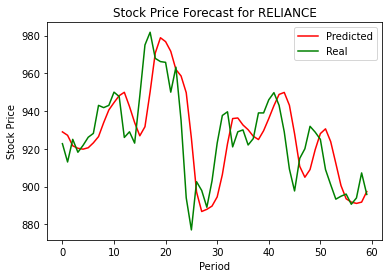

In [ ]:
plt.plot(predicted_stock_price, color="red", label= "Predicted")
plt.plot(real_stock_price, color="green", label= "Real")
plt.xlabel("Period")
plt.ylabel("Stock Price")
plt.title(f'Stock Price Forecast for {STOCK}')
plt.legend()
plt.show()

In [ ]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import math 



MAE_RNN = mean_absolute_error(real_stock_price,predicted_stock_price) #8.477951782226564

MSE_RNN = mean_squared_error(real_stock_price,predicted_stock_price) #131.51032080751082

RMSE_RNN = math.sqrt(MSE_RNN) #11.467794940942692

R2_RNN = r2_score(real_stock_price,predicted_stock_price) #0.39490875968951855

real_stock_price_mean = real_stock_price.mean()  #807.5260000000001


print("Mean Absolute Error:", MAE_RNN)
print("Mean Squared Error:", MSE_RNN)
print("Root Mean Squared Error:", RMSE_RNN)
print("R Squared:", R2_RNN)
print("Real Stock Price Mean:", real_stock_price_mean)
print("RMSE_RNN/REAL_STOCK_PRICE_MEAN:", RMSE_RNN/real_stock_price_mean) #0.014201146391500325

print("mean_absolute_percentage_error :", MAE_RNN/real_stock_price_mean *100 , " %")

Mean Absolute Error: 13.554478759765624
Mean Squared Error: 331.6976766203841
Root Mean Squared Error: 18.21256919329022
R Squared: 0.38751686814817077
Real Stock Price Mean: 925.9549999999999
RMSE_RNN/REAL_STOCK_PRICE_MEAN: 0.019668957123499763
mean_absolute_percentage_error : 1.4638377415496029  %
